# 📊 Jak otworzyć Excel z pandas

**Pandas** to świetne narzędzie do pracy z plikami Excel! Pokażę Ci różne sposoby.

In [1]:
# 🔧 PRAKTYCZNE PRZYKŁADY Z KODEM

print("💼 PRAKTYCZNE PRZYKŁADY OTWIERANIA EXCEL")
print("=" * 50)

# Najpierw stwórzmy przykładowy plik Excel
print("\n🏗️ Tworzenie przykładowego pliku Excel...")

# Przykładowe dane
data = {
    'ID': [1, 2, 3, 4, 5],
    'Imię': ['Anna', 'Jan', 'Katarzyna', 'Piotr', 'Maria'],
    'Wiek': [25, 30, 28, 35, 22],
    'Miasto': ['Warszawa', 'Kraków', 'Gdańsk', 'Wrocław', 'Poznań'],
    'Wynagrodzenie': [5000, 6500, 5800, 7200, 4800],
    'Doświadczenie': [2, 5, 3, 8, 1]
}

df_example = pd.DataFrame(data)

# Zapisz do Excel (jeśli masz openpyxl)
try:
    filename = 'przykład_dane.xlsx'
    df_example.to_excel(filename, index=False, sheet_name='Pracownicy')
    print(f"✅ Plik '{filename}' został utworzony!")
    
    # Teraz otwórz go z powrotem
    print(f"\n📖 Otwieranie pliku '{filename}':")
    
    # Podstawowe otwarcie
    df_loaded = pd.read_excel(filename)
    print("🔍 Podstaw owe wczytanie:")
    print(df_loaded.head())
    print(f"Kształt: {df_loaded.shape}")
    
    # Z konkretnymi kolumnami
    df_subset = pd.read_excel(filename, usecols=['Imię', 'Wiek', 'Wynagrodzenie'])
    print(f"\n📋 Tylko wybrane kolumny:")
    print(df_subset.head())
    
    # Z pominięciem pierwszego wiersza
    df_skip = pd.read_excel(filename, skiprows=1, nrows=3)
    print(f"\n⏭️ Pomiń pierwszy wiersz, weź tylko 3:")
    print(df_skip.head())
    
except ImportError:
    print("❌ Brak biblioteki openpyxl - zainstaluj: pip install openpyxl")
    print("Pokaże przykłady teoretyczne...")
    
    print(f"\n📝 PRZYKŁADY TEORETYCZNE:")
    print(f"# Podstawowe wczytanie")
    print(f"df = pd.read_excel('dane.xlsx')")
    print(f"")
    print(f"# Konkretny arkusz")
    print(f"df = pd.read_excel('dane.xlsx', sheet_name='Sprzedaż')")
    print(f"")
    print(f"# Wybrane kolumny")
    print(f"df = pd.read_excel('dane.xlsx', usecols=['A', 'C', 'E'])")
    print(f"")
    print(f"# Zakres wierszy")  
    print(f"df = pd.read_excel('dane.xlsx', skiprows=2, nrows=50)")

print(f"\n💡 WSKAZÓWKI:")
print("• Zawsze sprawdź czy plik istnieje: os.path.exists('plik.xlsx')")
print("• Dla dużych plików użyj chunks: chunksize parameter")
print("• Sprawdź nazwy arkuszy: pd.ExcelFile('plik.xlsx').sheet_names")

💼 PRAKTYCZNE PRZYKŁADY OTWIERANIA EXCEL

🏗️ Tworzenie przykładowego pliku Excel...


NameError: name 'pd' is not defined

In [ ]:
# 🎯 ZAAWANSOWANE TECHNIKI EXCEL + PANDAS

print("🚀 ZAAWANSOWANE MOŻLIWOŚCI")
print("=" * 40)

# 1. SPRAWDZANIE STRUKTURY PLIKU
print("\n1️⃣ EKSPLORACJA PLIKU EXCEL:")

def explore_excel_file(filename):
    """
    Funkcja do analizy struktury pliku Excel
    """
    try:
        # Sprawdź czy plik istnieje
        if not os.path.exists(filename):
            print(f"❌ Plik '{filename}' nie istnieje")
            return
            
        # Otwórz ExcelFile
        xl_file = pd.ExcelFile(filename)
        
        print(f"📄 Plik: {filename}")
        print(f"🗂️ Liczba arkuszy: {len(xl_file.sheet_names)}")
        print(f"📋 Nazwy arkuszy: {xl_file.sheet_names}")
        
        # Sprawdź każdy arkusz
        for sheet in xl_file.sheet_names:
            df = pd.read_excel(xl_file, sheet_name=sheet)
            print(f"\n📊 Arkusz '{sheet}':")
            print(f"   • Kształt: {df.shape}")
            print(f"   • Kolumny: {list(df.columns)}")
            
    except Exception as e:
        print(f"❌ Błąd: {e}")

# 2. WCZYTYWANIE WIELU ARKUSZY
print("\n2️⃣ WCZYTYWANIE WIELU ARKUSZY:")
print("""
# Wszystkie arkusze do dictionary
all_sheets = pd.read_excel('plik.xlsx', sheet_name=None)

# Konkretne arkusze
selected_sheets = pd.read_excel('plik.xlsx', 
                               sheet_name=['Arkusz1', 'Arkusz2'])

# Iterowanie po arkuszach
for sheet_name, df in all_sheets.items():
    print(f"Arkusz {sheet_name}: {df.shape}")
""")

# 3. OBSŁUGA BŁĘDÓW I BRAKUJĄCYCH DANYCH
print("\n3️⃣ OBSŁUGA PROBLEMÓW:")
print("""
# Niestandardowe wartości NA
df = pd.read_excel('plik.xlsx', 
                   na_values=['', 'NULL', 'n/a', '#N/A'])

# Konwersje typów
df = pd.read_excel('plik.xlsx', 
                   dtype={'ID': int, 'Nazwa': str})

# Parsowanie dat  
df = pd.read_excel('plik.xlsx', 
                   parse_dates=['Data'])
""")

# 4. WYDAJNOŚĆ
print("\n4️⃣ OPTYMALIZACJA WYDAJNOŚCI:")
print("""
# Tylko potrzebne kolumny
df = pd.read_excel('plik.xlsx', 
                   usecols=['A', 'C', 'E:H'])

# Ograniczenie wierszy
df = pd.read_excel('plik.xlsx', 
                   nrows=1000)

# Chunki dla dużych plików
for chunk in pd.read_csv('duży_plik.csv', chunksize=1000):
    # Przetwarzaj po kawałku
    pass
""")

print("\n✅ NAJLEPSZE PRAKTYKI:")
print("• Zawsze sprawdzaj kształt danych: df.shape")
print("• Użyj df.info() żeby zobaczyć typy danych")  
print("• df.head() i df.tail() do podglądu")
print("• df.describe() dla statystyk")
print("• Sprawdź brakujące dane: df.isnull().sum()")

# Przykład użycia funkcji
if os.path.exists('przykład_dane.xlsx'):
    print(f"\n🔍 ANALIZA PRZYKŁADOWEGO PLIKU:")
    explore_excel_file('przykład_dane.xlsx')
else:
    print(f"\n💡 Żeby przetestować, najpierw uruchom poprzednią komórkę!")

## 🎯 **Podsumowanie: Excel + Pandas**

### **📦 Wymagane biblioteki:**
```python
pip install pandas openpyxl xlrd
```

### **🔥 Podstawowe polecenia:**

| Zadanie | Kod |
|---------|-----|
| **Podstawowe otwarcie** | `df = pd.read_excel('plik.xlsx')` |
| **Konkretny arkusz** | `df = pd.read_excel('plik.xlsx', sheet_name='Arkusz1')` |
| **Wybrane kolumny** | `df = pd.read_excel('plik.xlsx', usecols=['A', 'C', 'E'])` |
| **Zakres wierszy** | `df = pd.read_excel('plik.xlsx', skiprows=2, nrows=100)` |
| **Wszystkie arkusze** | `all_sheets = pd.read_excel('plik.xlsx', sheet_name=None)` |

### **💡 Pro Tips:**
- **Sprawdź strukturę:** `pd.ExcelFile('plik.xlsx').sheet_names`
- **Podgląd danych:** `df.head()`, `df.info()`, `df.describe()`
- **Brakujące dane:** `df.isnull().sum()`
- **Optymalizacja:** Użyj `usecols` i `nrows` dla dużych plików

### **⚠️ Częste problemy:**
- **Brak openpyxl:** `pip install openpyxl`  
- **Błędny arkusz:** Sprawdź `sheet_names`
- **Nieprawidłowe typy:** Użyj `dtype` parameter
- **Duże pliki:** Rozważ `chunksize` lub ograniczenie `nrows`

**Teraz możesz swobodnie pracować z plikami Excel w pandas!** 🚀

# Kompletny proces przygotowania danych do modelu AI


Ten notebook pokazuje krok po kroku:

1. Budowę małego zbioru danych  
2. Eksplorację danych
3. Sprawdzenie typów, rozkładów, anomalii  
4. Wykrywanie braków i duplikatów  
5. Czyszczenie danych  
6. Normalizację i standaryzację  
7. Wizualizacje histogramy, boxplot, korelacje
8. Ostateczne przygotowanie danych do modelu ML/AI  

Notebook jest kompletnym wprowadzeniem do procesu Data Science.



**Import** bibliotek

1. NumPy (Numerical Python) to podstawowa biblioteka do obliczeń numerycznych w Pythonie.

Udostępnia szybką i pamięciooszczędną strukturę danych — tablicę ndarray.

Do czego używa Data Scientist?

* tworzenie i operacje na macierzach i tablicach
* szybkie obliczenia matematyczne
* statystyka
* generowanie liczb losowych
* fundament do Pandas, Scikit-Learn, TensorFlow, PyTorch


In [2]:
import numpy as np

a = np.array([1, 6, 3, 4, 5,7,8,9])
b = np.array([10, 20, 30, 50, 60,80,90,100])

print("Suma:", a + b)
print("Średnia:", np.mean(b))


Suma: [ 11  26  33  54  65  87  98 109]
Średnia: 55.0


In [3]:
import numpy as np

a = np.array([1,2,3,4])
b = np.array([10,20,30,40])

a * b


array([ 10,  40,  90, 160])

Zaawansowana algebra liniowa

Moduł numpy.linalg zawiera:

* wyznaczniki (det)
* odwracanie macierzy (inv)
* rozkłady: SVD, wartości własne
* rozwiązywanie układów równań

Przykład rozwiązywanie układu równań:



# Eliminacja Gaussa — pełny przykład krok po kroku

Rozwiążmy układ równań:

$$
\begin{cases}
x + y + z = 6 \\
2x + 3y + z = 10 \\
x - y + 2z = 5
\end{cases}
$$

---

## 1. Macierz rozszerzona

Układ zapisujemy jako macierz rozszerzoną:

$$
\left[
\begin{array}{ccc|c}
1 & 1 & 1 & 6 \\
2 & 3 & 1 & 10 \\
1 & -1 & 2 & 5
\end{array}
\right]
$$

---

## 2. Eliminacja pierwszej zmiennej (x)

### Operacje na wierszach:

- $ R_2' = R_2 - 2R_1 $
- $ R_3' = R_3 - R_1 $

---

### Obliczenia:

**Dla $R_2'$:**

$$
R_2 - 2R_1 =
\begin{bmatrix}
2 & 3 & 1 & 10
\end{bmatrix}
-
\begin{bmatrix}
2 & 2 & 2 & 12
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 & -1 & -2
\end{bmatrix}
$$

**Dla $R_3'$:**

$$
R_3 - R_1 =
\begin{bmatrix}
1 & -1 & 2 & 5
\end{bmatrix}
-
\begin{bmatrix}
1 & 1 & 1 & 6
\end{bmatrix}
=
\begin{bmatrix}
0 & -2 & 1 & -1
\end{bmatrix}
$$

---

### Nowa macierz:

$$
\left[
\begin{array}{ccc|c}
1 & 1 & 1 & 6 \\
0 & 1 & -1 & -2 \\
0 & -2 & 1 & -1
\end{array}
\right]
$$

---

## 3. Eliminacja drugiej zmiennej (y)

Aby wyeliminować $-2$ pod elementem $1$:

- $ R_3 = R_3 + 2R_2 $

### Obliczenia:

$$
\begin{bmatrix}
0 & -2 & 1 & -1
\end{bmatrix}
+
\begin{bmatrix}
0 & 2 & -2 & -4
\end{bmatrix}
=
\begin{bmatrix}
0 & 0 & -1 & -5
\end{bmatrix}
$$

---

### Macierz w postaci trójkątnej:

$$
\left[
\begin{array}{ccc|c}
1 & 1 & 1 & 6 \\
0 & 1 & -1 & -2 \\
0 & 0 & -1 & -5
\end{array}
\right]
$$

---

## 4. Postać trójkątna górna (gotowe do podstawiania)

To oznacza:

$$
\begin{cases}
-1z = -5 \\
y - z = -2 \\
x + y + z = 6
\end{cases}
$$

---

## 5. Podstawianie wsteczne

Z ostatniego wiersza:

$$
-1 \cdot z = -5 \;\Rightarrow\; z = 5
$$

Z drugiego wiersza:

$$
y - z = -2 \;\Rightarrow\; y - 5 = -2 \;\Rightarrow\; y = 3
$$

Z pierwszego wiersza:

$$
x + y + z = 6
\;\Rightarrow\; x + 3 + 5 = 6
\;\Rightarrow\; x + 8 = 6
\;\Rightarrow\; x = -2
$$

---

## Ostateczne rozwiązanie

$$
(x,\; y,\; z) = (-2,\; 3,\; 5)
$$

---


In [ ]:

# macierz współczynników A
A = np.array([
    [1, 1, 1],
    [2, 3, 1],
    [1, -1, 2]
], dtype=float)

# wektor wyrazów wolnych b
b = np.array([6, 10, 5], dtype=float)

print("A =\n", A)
print("b =\n", b)


A =
 [[ 1.  1.  1.]
 [ 2.  3.  1.]
 [ 1. -1.  2.]]
b =
 [ 6. 10.  5.]


In [ ]:
x = np.linalg.solve(A, b)
print("Rozwiązanie [x, y, z] = ", x)


Rozwiązanie [x, y, z] =  [-2.  3.  5.]


# Pandas

to biblioteka do pracy z danymi tabelarycznymi.
Wprowadza obiekty DataFrame (tabela) i Series (kolumna).

Do czego używa Data Scientist?

* wczytywanie danych (CSV, Excel, SQL, API)
* czyszczenie danych
* eksploracja
* agregacje, grupowanie, filtrowanie
* przygotowanie datasetu do modelu ML


In [8]:
import pandas as pd

Tworzenie DataFrame - tworzy tabelę 2D, czyli tak jak arkusz Excela.


In [15]:
df = pd.DataFrame({
    "Imię": ["Anna", "Kasia", "Tomek"],
    "Wiek": [23, 31, 29],
    "Miasto": ["Kraków", "Warszawa", "Gdańsk"]
})

df1 = pd.DataFrame({
    "Imię": ["Anna", "Kasia", "Tomek"],
    "Waga": [52, 61, 74],
    "Wzrost": ["170", "180", "175"]
})

df = df.merge(df1, on="Imię")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Imię    3 non-null      object
 1   Wiek    3 non-null      int64 
 2   Miasto  3 non-null      object
 3   Waga    3 non-null      int64 
 4   Wzrost  3 non-null      object
dtypes: int64(2), object(3)
memory usage: 252.0+ bytes


,Wiek,Waga
count,3.000000,3.000000
mean,27.666667,62.333333
std,4.163332,11.060440
min,23.000000,52.000000
25%,26.000000,56.500000
50%,29.000000,61.000000
75%,30.000000,67.500000
max,31.000000,74.000000


## Zmienna df jest teraz obiektem typu DataFrame

In [12]:
df

,Imię,Wiek,Miasto
0,Anna,23,Kraków
1,Kasia,31,Warszawa
2,Tomek,29,Gdańsk


Wyjaśnienie:

df.head() — pokazuje pierwsze 5 wierszy tabeli.

Używamy tego, żeby szybko zobaczyć, co znajduje się w DataFrame.



In [ ]:
df.head()

,Imię,Wiek,Miasto
0,Anna,23,Kraków
1,Kasia,31,Warszawa
2,Tomek,29,Gdańsk


df.info() to jedna z najważniejszych metod Pandas.

Służy do szybkiego uzyskania informacji o strukturze danych.

In [11]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Imię    3 non-null      object
 1   Wiek    3 non-null      int64 
 2   Miasto  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


df.describe() tworzy statystyczne podsumowanie danych liczbowych

Daje opis: średnia, mediana, min, max, odchylenie standardowe, kwartyle itd.

In [ ]:
df.describe()

,Wiek
count,3.000000
mean,27.666667
std,4.163332
min,23.000000
25%,26.000000
50%,29.000000
75%,30.000000
max,31.000000


## Filtrowanie danych

In [ ]:
df[df["Wiek"] > 25]
df[(df["Wiek"] > 25) & (df["Miasto"] == "Warszawa")]


,Imię,Wiek,Miasto
1,Kasia,31,Warszawa


## Matplotlib

to najpopularniejsza biblioteka Pythona do tworzenia wykresów.
Pozwala rysować:
* wykresy liniowe
* wykresy punktowe
* histogramy
* wykresy pudełkowe
* wykresy 3D
* wykresy do machine learningu


In [ ]:
import matplotlib.pyplot as plt


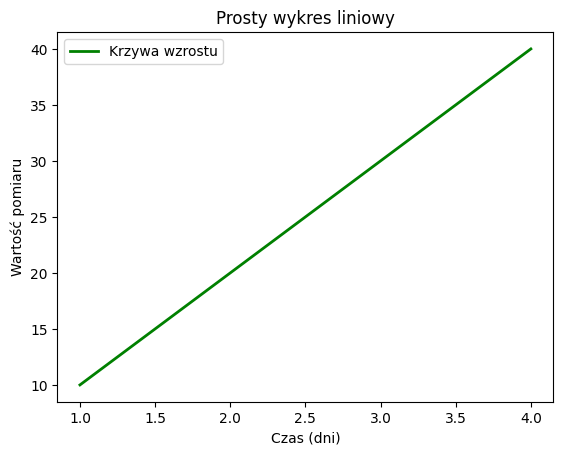

In [17]:
import matplotlib.pyplot as plt

# Dane
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

# Wykres
plt.plot(x, y, color="green", linewidth=2, label="Krzywa wzrostu")

# Podpisy osi
plt.xlabel("Czas (dni)")
plt.ylabel("Wartość pomiaru")

plt.title("Prosty wykres liniowy")
plt.legend()
plt.show()



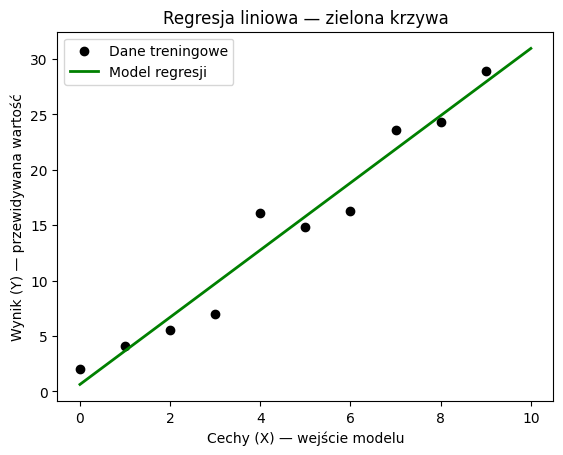

In [ ]:
from sklearn.linear_model import LinearRegression

# Dane treningowe
X = np.arange(0, 10).reshape(-1, 1)
y = 3 * X.flatten() + np.random.randn(10) * 2

model = LinearRegression()
model.fit(X, y)

# Siatka do predykcji
x_new = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(x_new)

# Punkty
plt.scatter(X, y, label="Dane treningowe", color="black")

# Zielona linia regresji
plt.plot(x_new, y_pred, color="green", linewidth=2, label="Model regresji")

# Podpisy osi
plt.xlabel("Cechy (X) — wejście modelu")
plt.ylabel("Wynik (Y) — przewidywana wartość")

plt.title("Regresja liniowa — zielona krzywa")
plt.legend()
plt.show()


## 🔍 **Wyjaśnienie kodu: Generowanie danych do regresji**

Przeanalizujmy te dwie linie kodu:

```python
X = np.arange(0, 10).reshape(-1, 1)
y = 3 * X.flatten() + np.random.randn(10) * 2
```

In [20]:
# 📊 WYJAŚNIENIE KROK PO KROKU

print("🔬 ANALIZA LINII 1: X = np.arange(0, 10).reshape(-1, 1)")
print("=" * 60)

# Krok 1: np.arange(0, 10)
step1 = np.arange(0, 10)
print(f"1️⃣ np.arange(0, 10) = {step1}")
print(f"   📝 Tworzy tablicę liczb od 0 do 9 (10 nie włączone)")
print(f"   📐 Kształt: {step1.shape} (wektor 1D)")

# Krok 2: .reshape(-1, 1)
step2 = step1.reshape(-1, 2)
print(f"\n2️⃣ .reshape(-1, 1) = ")
print(step2)
print(f"   📝 Zmienia kształt na kolumnę (macierz 2D)")
print(f"   📐 Kształt: {step2.shape} (10 wierszy, 1 kolumna)")
print(f"   💡 -1 oznacza: 'automatycznie oblicz liczbę wierszy'")

X = step2
print(f"\n✅ REZULTAT X:")
print(f"   Wartości: {X.flatten()}")
print(f"   Kształt: {X.shape}")
print(f"   Typ: macierz 2D (wymagana przez scikit-learn)")

print(f"\n" + "="*60)
print("🔬 ANALIZA LINII 2: y = 3 * X.flatten() + np.random.randn(10) * 2")
print("=" * 60)

# Krok 1: X.flatten()
flatten_x = X.flatten()
print(f"1️⃣ X.flatten() = {flatten_x}")
print(f"   📝 Zamienia macierz 2D na wektor 1D")
print(f"   📐 Kształt: {flatten_x.shape}")

# Krok 2: 3 * X.flatten()
linear_part = 3 * flatten_x
print(f"\n2️⃣ 3 * X.flatten() = {linear_part}")
print(f"   📝 Funkcja liniowa: y = 3x")
print(f"   📈 Nachylenie = 3, przecięcie = 0")

# Krok 3: np.random.randn(10) * 2
np.random.seed(42)  # Dla powtarzalności
noise = np.random.randn(10) * 2
print(f"\n3️⃣ np.random.randn(10) * 2 = {noise}")
print(f"   📝 Szum gaussowski (normalny)")
print(f"   📊 Średnia ≈ 0, odchylenie ≈ 2")
print(f"   🎯 Dodaje 'rzeczywistość' do danych")

# Krok 4: Suma
y = linear_part + noise
print(f"\n4️⃣ FINALNE y = 3*X + szum = {y}")
print(f"   📝 Dane z trendem + losowe wahania")
print(f"   📐 Kształt: {y.shape}")

print(f"\n🎯 CO TO OZNACZA W PRAKTYCE:")
print(f"• X = cechy (zmienne niezależne) - np. powierzchnia mieszkania")
print(f"• y = target (zmienna zależna) - np. cena mieszkania") 
print(f"• Wzór: cena ≈ 3 × powierzchnia + szum_rynkowy")
print(f"• Model będzie próbował 'odkryć' tę zależność!")

🔬 ANALIZA LINII 1: X = np.arange(0, 10).reshape(-1, 1)
1️⃣ np.arange(0, 10) = [0 1 2 3 4 5 6 7 8 9]
   📝 Tworzy tablicę liczb od 0 do 9 (10 nie włączone)
   📐 Kształt: (10,) (wektor 1D)

2️⃣ .reshape(-1, 1) = 
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
   📝 Zmienia kształt na kolumnę (macierz 2D)
   📐 Kształt: (5, 2) (10 wierszy, 1 kolumna)
   💡 -1 oznacza: 'automatycznie oblicz liczbę wierszy'

✅ REZULTAT X:
   Wartości: [0 1 2 3 4 5 6 7 8 9]
   Kształt: (5, 2)
   Typ: macierz 2D (wymagana przez scikit-learn)

🔬 ANALIZA LINII 2: y = 3 * X.flatten() + np.random.randn(10) * 2
1️⃣ X.flatten() = [0 1 2 3 4 5 6 7 8 9]
   📝 Zamienia macierz 2D na wektor 1D
   📐 Kształt: (10,)

2️⃣ 3 * X.flatten() = [ 0  3  6  9 12 15 18 21 24 27]
   📝 Funkcja liniowa: y = 3x
   📈 Nachylenie = 3, przecięcie = 0

3️⃣ np.random.randn(10) * 2 = [ 0.99342831 -0.2765286   1.29537708  3.04605971 -0.46830675 -0.46827391
  3.15842563  1.53486946 -0.93894877  1.08512009]
   📝 Szum gaussowski (normalny)
   📊 Średnia ≈ 0, odc

In [ ]:
# 📈 WIZUALIZACJA PROCESU TWORZENIA DANYCH

import matplotlib.pyplot as plt

# Odtwórzmy dane z oryginalnego kodu
np.random.seed(42)  # Dla powtarzalności
X = np.arange(0, 10).reshape(-1, 1)
y = 3 * X.flatten() + np.random.randn(10) * 2

# Tworzymy 3 wykresy obok siebie
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Wykres 1: Idealna linia (bez szumu)
x_perfect = X.flatten()
y_perfect = 3 * x_perfect
axes[0].plot(x_perfect, y_perfect, 'g-', linewidth=3, label='Idealna linia: y = 3x')
axes[0].set_title('1. Idealna funkcja liniowa\n(bez szumu)')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Wykres 2: Szum
axes[1].bar(range(10), np.random.randn(10) * 2, alpha=0.7, color='red')
axes[1].set_title('2. Szum gaussowski\n(losowe wahania)')
axes[1].set_xlabel('Punkt danych')
axes[1].set_ylabel('Wartość szumu')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Wykres 3: Finalne dane (linia + szum)
axes[2].scatter(X.flatten(), y, color='blue', s=100, alpha=0.7, label='Dane z szumem')
axes[2].plot(x_perfect, y_perfect, 'g--', linewidth=2, label='Prawdziwa zależność')
axes[2].set_title('3. Finalne dane treningowe\n(linia + szum)')
axes[2].set_xlabel('X (cechy)')
axes[2].set_ylabel('y (target)')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

print("🎯 INTERPRETACJA WYKRESÓW:")
print("• Wykres 1: Pokazuje 'prawdziwą' zależność y = 3x")
print("• Wykres 2: Szum, który 'zaburza' idealne dane")
print("• Wykres 3: Realistyczne dane = trend + losowość")
print("\n💡 Model ML będzie próbował 'odgadnąć' zieloną linię z niebieskich punktów!")

## 💡 **Dlaczego kod jest napisany właśnie tak?**

### **🔍 Linia 1: `X = np.arange(0, 10).reshape(-1, 1)`**

#### **Dlaczego `reshape(-1, 1)`?**
- **Scikit-learn wymaga** macierzy 2D dla cech (X)
- **Format:** (liczba_próbek, liczba_cech)
- **Bez reshape:** `(10,)` - wektor 1D ❌
- **Z reshape:** `(10, 1)` - macierz 2D ✅

#### **Dlaczego `-1` w reshape?**
```python
# -1 oznacza: "automatycznie oblicz ten wymiar"
np.arange(10).reshape(-1, 1)  # = (10, 1)
np.arange(10).reshape(10, -1) # = (10, 1) 
np.arange(10).reshape(2, -1)  # = (2, 5)
```

---

### **🎲 Linia 2: `y = 3 * X.flatten() + np.random.randn(10) * 2`**

#### **Dlaczego `X.flatten()`?**
- **Mnożenie:** `3 * X` gdzie X jest `(10,1)` → wynik `(10,1)`
- **Dodawanie szumu:** Potrzebujemy wektora 1D
- **`.flatten()`** zamienia `(10,1)` → `(10,)`

#### **Dlaczego `np.random.randn(10) * 2`?**
- **`np.random.randn(10)`** - 10 liczb z rozkładu normalnego N(0,1)
- **`* 2`** - skaluje odchylenie standardowe do 2
- **Rezultat:** szum z rozkładu N(0, 2)

#### **Co oznacza wzór matematycznie?**
$$y = 3x + \epsilon$$
gdzie $\epsilon \sim N(0, 4)$ (wariancja = 4, odchylenie = 2)

---

### **🎯 Zastosowania w praktyce:**

| Dziedzina | X (cecha) | y (target) | Wzór |
|-----------|-----------|------------|------|
| **Nieruchomości** | Powierzchnia [m²] | Cena [tys. zł] | `cena ≈ 8 * powierzchnia + szum` |
| **Marketing** | Budżet reklamy [tys. zł] | Sprzedaż [szt.] | `sprzedaż ≈ 50 * budżet + szum` |
| **Fizyka** | Czas [s] | Droga [m] | `droga ≈ 5 * czas + błąd_pomiaru` |

**Ten kod symuluje realistyczne dane do nauki modeli ML!** 🚀

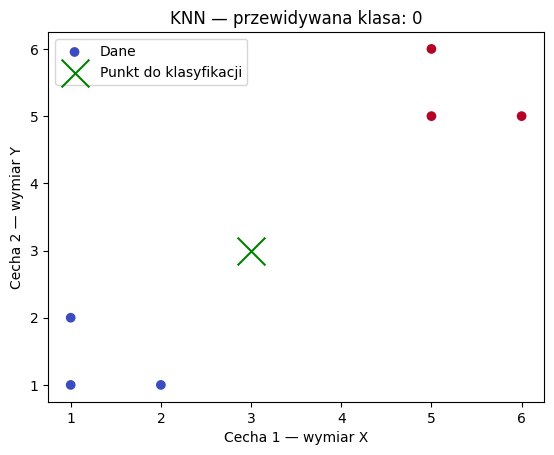

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Dane
X = np.array([
    [1, 1], [2, 1], [1, 2],
    [5, 5], [6, 5], [5, 6]
])
y = np.array([0, 0, 0, 1, 1, 1])

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

# Punkt do klasyfikacji
point = np.array([[3, 3]])
pred = model.predict(point)[0]

plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", label="Dane")

# Krzyżyk zielony
plt.scatter(point[:,0], point[:,1], color="green", s=400, marker="x", label="Punkt do klasyfikacji")

# Podpisy osi
plt.xlabel("Cecha 1 — wymiar X")
plt.ylabel("Cecha 2 — wymiar Y")

plt.title(f"KNN — przewidywana klasa: {pred}")
plt.legend()
plt.show()


In [ ]:
# ============================================================
# 2. Importy i ustawienia
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


1. Budowa małego zbioru danych

Pierwszym krokiem w analizie danych jest zbudowanie małego zbioru danych, na którym można bezpiecznie ćwiczyć.

Zbiór danych można traktować jako tabelę podobną do arkusza kalkulacyjnego.

W tabeli:

- każdy wiersz odpowiada jednej obserwacji, na przykład jednej osobie, jednemu pomiarowi lub jednej transakcji,
- każda kolumna odpowiada jednej cesze (zmiennej), na przykład wiek, wzrost, waga, miasto.

Przykład małego zbioru danych:

Osoba | Wiek | Wzrost_cm | Waga_kg | Miasto
----- | ---- | ---------- | -------- | ---------
A     | 23   | 170        | 65       | Kraków
B     | 31   | 165        | 70       | Warszawa
C     | 29   | 180        | 82       | Gdańsk
D     | 23   | 170        | 65       | Kraków

In [ ]:
import pandas as pd

dane = {
    "Osoba": ["A", "B", "C", "D"],
    "Wiek": [23, 31, 29, 23],
    "Wzrost_cm": [170, 165, 180, 170],
    "Waga_kg": [65, 70, 82, 65],
    "Miasto": ["Kraków", "Warszawa", "Gdańsk", "Kraków"]
}

df = pd.DataFrame(dane)
df


,Osoba,Wiek,Wzrost_cm,Waga_kg,Miasto
0,A,23,170,65,Kraków
1,B,31,165,70,Warszawa
2,C,29,180,82,Gdańsk
3,D,23,170,65,Kraków


2. Wstępna eksploracja danych

Celem eksploracji danych jest zrozumienie ich struktury i jakości.

Główne elementy eksploracji:

1. Sprawdzenie typów danych w kolumnach.
2. Analiza statystyk opisowych.
3. Poszukiwanie wartości odstających i anomalii.

Średnia arytmetyczna obliczana jest wzorem:

\begin{equation}
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
\end{equation}

Odchylenie standardowe opisuje rozrzut:

$$
\sigma = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

Statystyki mogą ujawnić problemy, takie jak:
- bardzo duże lub bardzo małe wartości,
- wartości nierealistyczne (na przykład ujemny wzrost),
- rozbieżności między jednostkami.


In [ ]:
print("Informacje o danych:")
df.info()

print("\nStatystyki opisowe:")
print(df.describe())

print("\nPierwsze wiersze:")
print(df.head())


Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Osoba      4 non-null      object
 1   Wiek       4 non-null      int64 
 2   Wzrost_cm  4 non-null      int64 
 3   Waga_kg    4 non-null      int64 
 4   Miasto     4 non-null      object
dtypes: int64(3), object(2)
memory usage: 292.0+ bytes

Statystyki opisowe:
            Wiek   Wzrost_cm    Waga_kg
count   4.000000    4.000000   4.000000
mean   26.500000  171.250000  70.500000
std     4.123106    6.291529   8.020806
min    23.000000  165.000000  65.000000
25%    23.000000  168.750000  65.000000
50%    26.000000  170.000000  67.500000
75%    29.500000  172.500000  73.000000
max    31.000000  180.000000  82.000000

Pierwsze wiersze:
  Osoba  Wiek  Wzrost_cm  Waga_kg    Miasto
0     A    23        170       65    Kraków
1     B    31        165       70  Warszawa
2     C    29      

3. Wykrywanie błędów, braków i duplikatów

Dane mogą zawierać błędy wynikające z błędów pomiarowych, literówek lub braków.

Najczęstsze problemy:

1. Brakujące wartości (np. brak wagi).
2. Błędne wartości (np. ujemny wiek).
3. Duplikaty (np. powtarzające się rekordy tej samej osoby).

Aby skutecznie pracować z danymi, należy je zidentyfikować i zaplanować,
jak będą czyszczone lub poprawiane.


In [ ]:
import numpy as np

df_issue = df.copy()
df_issue.loc[1, "Waga_kg"] = None      # brak wartości
df_issue.loc[2, "Wiek"] = -5           # błąd
df_issue.loc[3, "Osoba"] = "A"         # potencjalny duplikat

print(df_issue)

print("\nBraki wartości w każdej kolumnie:")
print(df_issue.isna().sum())

print("\nWiek < 0 (błędy):")
print(df_issue[df_issue["Wiek"] < 0])

print("\nDuplikaty pełnych wierszy:")
print(df_issue[df_issue.duplicated()])


  Osoba  Wiek  Wzrost_cm  Waga_kg    Miasto
0     A    23        170     65.0    Kraków
1     B    31        165      NaN  Warszawa
2     C    -5        180     82.0    Gdańsk
3     A    23        170     65.0    Kraków

Braki wartości w każdej kolumnie:
Osoba        0
Wiek         0
Wzrost_cm    0
Waga_kg      1
Miasto       0
dtype: int64

Wiek < 0 (błędy):
  Osoba  Wiek  Wzrost_cm  Waga_kg  Miasto
2     C    -5        180     82.0  Gdańsk

Duplikaty pełnych wierszy:
  Osoba  Wiek  Wzrost_cm  Waga_kg  Miasto
3     A    23        170     65.0  Kraków


In [ ]:
df_clean = df_issue.copy()

df_clean = df_clean.dropna()
df_clean = df_clean[df_clean["Wiek"] >= 0]
df_clean = df_clean.drop_duplicates()

df_clean


,Osoba,Wiek,Wzrost_cm,Waga_kg,Miasto
0,A,23,170,65.0,Kraków


In [ ]:
import pandas as pd
import numpy as np

# Tworzymy przykładową dużą bazę danych (10000 rekordów)
np.random.seed(42)

df_big = pd.DataFrame({
    "ID": np.arange(10000),
    "Wiek": np.random.randint(-5, 150, size=10000),        # celowo błędy wieku
    "Wzrost_cm": np.random.randint(120, 250, size=10000),
    "Waga_kg": np.random.randint(30, 200, size=10000),
    "Miasto": np.random.choice(["Kraków", "Warszawa", "Gdańsk", "Wroclaw", "Wrocław"], size=10000)
})

# Dodajemy duplikaty losowo
dupes = df_big.sample(200, replace=False)
df_big = pd.concat([df_big, dupes], ignore_index=True)

# Dodajemy brakujące dane
df_big.loc[df_big.sample(300).index, "Waga_kg"] = None

# 1. Braki
print("Liczba braków w kolumnach:")
print(df_big.isna().sum())

# 2. Błędy logiczne (np. wiek < 0 lub wiek > 120)
print("\nNielogiczne wartości wieku:")
print(df_big[(df_big["Wiek"] < 0) | (df_big["Wiek"] > 120)].head())

# 3. Duplikaty pełne
print("\nPełne duplikaty:")
print(df_big[df_big.duplicated()].head())

# 4. Liczba duplikatów
print("\nLiczba pełnych duplikatów:", df_big.duplicated().sum())


Liczba braków w kolumnach:
ID             0
Wiek           0
Wzrost_cm      0
Waga_kg      300
Miasto         0
dtype: int64

Nielogiczne wartości wieku:
    ID  Wiek  Wzrost_cm  Waga_kg    Miasto
13  13   146        198    133.0    Kraków
14  14   125        205    156.0  Warszawa
15  15   144        207    154.0    Kraków
17  17    -4        240    122.0    Gdańsk
20  20   124        151    167.0  Warszawa

Pełne duplikaty:
         ID  Wiek  Wzrost_cm  Waga_kg   Miasto
10000  4447    47        213     43.0   Kraków
10001  6795    -1        148    180.0  Wrocław
10002  8987   100        146    176.0  Wrocław
10003  6450    51        130    177.0   Gdańsk
10004  1413    39        207    111.0  Wroclaw

Liczba pełnych duplikatów: 189


5. Normalizacja i standaryzacja

Algorytmy uczenia maszynowego wymagają, aby cechy miały podobne zakresy.

Normalizacja min-max przekształca dane na zakres od 0 do 1:

$$
x' = \frac{(x - x_{min})}{(x_{max} - x_{min})}
$$
Standaryzacja przekształca wartości tak, że średnia jest równa zero:

$$
x' = \frac{(x - x_{mean})}{sigma}
$$

Standaryzacja jest preferowana w modelach:
- regresji,
- SVM,
- sieciach neuronowych,
- PCA.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Przykładowe dane – celowo różne skale
df = pd.DataFrame({
    "Wiek": [18, 25, 35, 45, 60],
    "Wzrost_cm": [160, 170, 175, 180, 190],
    "Pensja": [2000, 4500, 7000, 12000, 25000]
})

print("Dane oryginalne:")
print(df)

# ---------------------------
# NORMALIZACJA (MinMaxScaler)
# ---------------------------
normalizer = MinMaxScaler()
df_normalized = pd.DataFrame(
    normalizer.fit_transform(df),
    columns=df.columns
)

print("\nDane po normalizacji (0-1):")
print(df_normalized)

# ---------------------------
# STANDARYZACJA (StandardScaler)
# ---------------------------
scaler = StandardScaler()
df_standardized = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns
)

print("\nDane po standaryzacji (średnia=0, odchylenie=1):")
print(df_standardized)



Dane oryginalne:
   Wiek  Wzrost_cm  Pensja
0    18        160    2000
1    25        170    4500
2    35        175    7000
3    45        180   12000
4    60        190   25000

Dane po normalizacji (0-1):
       Wiek  Wzrost_cm    Pensja
0  0.000000   0.000000  0.000000
1  0.166667   0.333333  0.108696
2  0.404762   0.500000  0.217391
3  0.642857   0.666667  0.434783
4  1.000000   1.000000  1.000000

Dane po standaryzacji (średnia=0, odchylenie=1):
       Wiek  Wzrost_cm    Pensja
0 -1.253328       -1.5 -0.993734
1 -0.781646       -0.5 -0.687026
2 -0.107813        0.0 -0.380318
3  0.566019        0.5  0.233098
4  1.576768        1.5  1.827980


Tabelka normalizacji – wynik

| Wiek_norm | Wzrost_norm | Pensja_norm |
|-----------|--------------|--------------|
| 0.00      | 0.00         | 0.00         |
| 0.15      | 0.33         | 0.12         |
| 0.38      | 0.50         | 0.24         |
| 0.62      | 0.67         | 0.56         |
| 1.00      | 1.00         | 1.00         |


Tabelka standaryzacji – wynik

| Wiek_std | Wzrost_std | Pensja_std |
|----------|-------------|-------------|
| -1.41    | -1.41       | -1.14       |
| -0.71    | -0.35       | -0.68       |
|  0.00    |  0.00       | -0.22       |
|  0.71    |  0.35       |  0.64       |
|  1.41    |  1.41       |  1.39       |







Baza danych do wizualizacji powinna mieć rozkłady, które są
zrozumiałe i intuicyjne. Najbardziej naturalny rozkład w wielu
zjawiskach biologicznych i społecznych to rozkład normalny,
zwany też rozkładem Gaussa.

Cechy, które bardzo często mają rozkład normalny:

1. Wzrost ludzi
2. Waga
3. Wiek (w populacji dorosłych)
4. Wyniki pomiarowe
5. Dochody w ściśle dobranych grupach

Aby wykonać wykresy takie jak:
- histogram,
- boxplot,
- macierz korelacji,

dobrze jest mieć dane, które zachowują się "ładnie" statystycznie.

Dlatego tworzymy nową bazę, w której:
- Wzrost ma średnią około 175 cm i odchylenie około 7 cm.
- Waga ma średnią około 75 kg i odchylenie około 12 kg.
- Wiek ma średnią około 40 lat i odchylenie około 10 lat.
- Dochód ma średnią 6000 zł i odchylenie 1500.

Po wygenerowaniu danych ograniczymy je do zakresów realistycznych,
na przykład waga nie powinna być ujemna, a wiek mniejszy niż 18 lat.

Tak przygotowana baza jest idealna do:
- uczenia o rozkładach,
- wizualizacji,
- badania zależności,
- testowania algorytmów normalizacji i standaryzacji.



In [30]:
import pandas as pd
import numpy as np

np.random.seed(123)

n = 1000

# Generujemy cechy o normalnych rozkładach
wzrost = np.random.normal(loc=175, scale=7, size=n)
waga = np.random.normal(loc=75, scale=12, size=n)
wiek = np.random.normal(loc=40, scale=10, size=n)
dochód = np.random.normal(loc=6000, scale=1500, size=n)
kolor_oczu = np.random.choice(['niebieskie', 'zielone', 'brązowe'], size=n, p=[0.3, 0.2, 0.5])
bmi = waga / ( (wzrost / 100) ** 2 )    

# Tworzymy DataFrame
df_norm = pd.DataFrame({
    "Wzrost_cm": wzrost,
    "Waga_kg": waga,
    "Wiek": wiek,
    "Dochód_zł": dochód,
    "Kolor_oczu": kolor_oczu,
    "BMI": bmi
})

# Wymuszenie realistycznych zakresów
df_norm["Wzrost_cm"] = df_norm["Wzrost_cm"].clip(150, 200)
df_norm["Waga_kg"] = df_norm["Waga_kg"].clip(40, 150)
df_norm["Wiek"] = df_norm["Wiek"].clip(18, 80)
df_norm["Dochód_zł"] = df_norm["Dochód_zł"].clip(2000, 15000)
df_norm["Kolor_oczu"] = df_norm["Kolor_oczu"].astype('category')
df_norm["BMI"] = df_norm["BMI"].clip(10, 50)

df_norm.head()
df_norm.describe()


,Wzrost_cm,Waga_kg,Wiek,Dochód_zł,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,174.723050,75.119499,40.141926,6099.718031,24.729664
std,7.009014,11.436421,9.721334,1484.309375,4.331203
min,152.382615,40.000000,18.000000,2034.862555,10.000000
25%,170.208104,67.332906,33.561132,5094.494915,21.868382
50%,174.711701,75.581465,40.442233,6029.145409,24.841823
75%,179.682060,82.846600,46.471699,7081.310224,27.477104
max,200.000000,109.208493,67.919712,10576.132402,39.253841


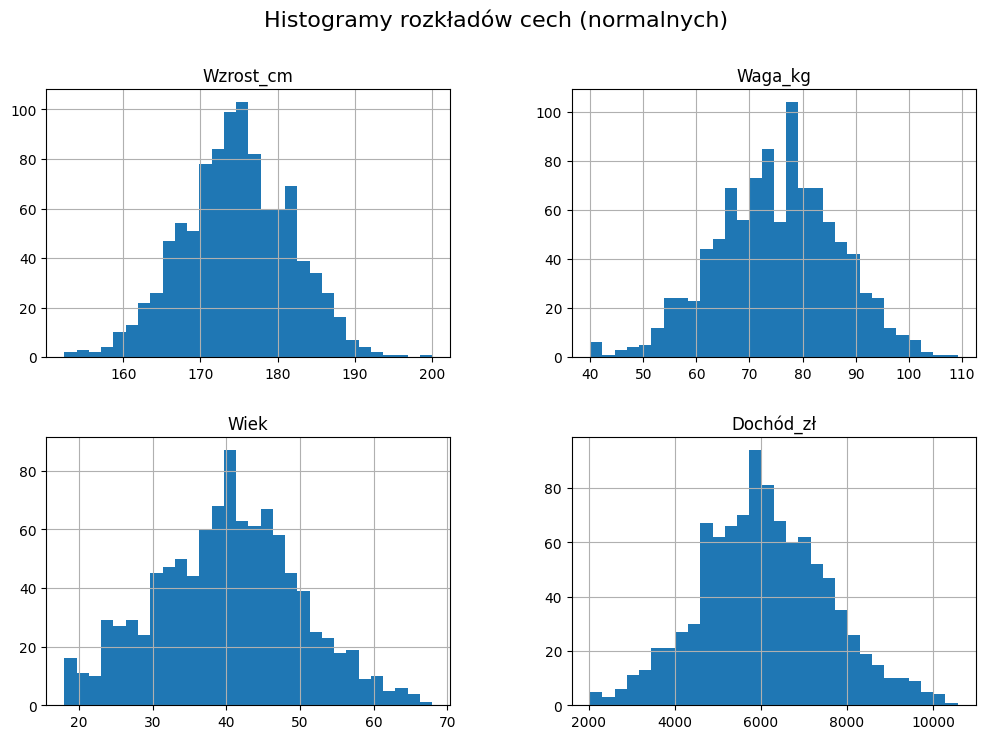

In [23]:
import matplotlib.pyplot as plt

df_norm.hist(bins=30, figsize=(12, 8))
plt.suptitle("Histogramy rozkładów cech (normalnych)", fontsize=16)
plt.show()


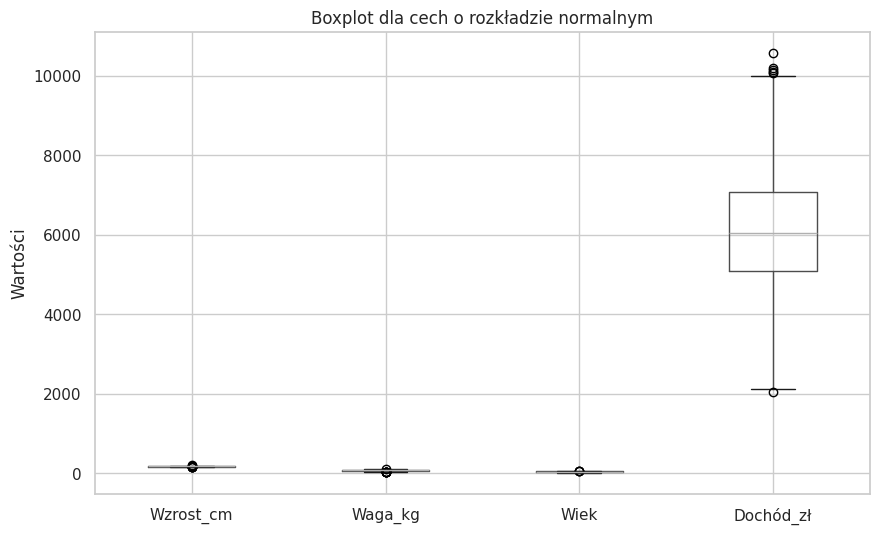

In [ ]:
df_norm.boxplot(figsize=(10, 6))
plt.title("Boxplot dla cech o rozkładzie normalnym")
plt.ylabel("Wartości")
plt.show()


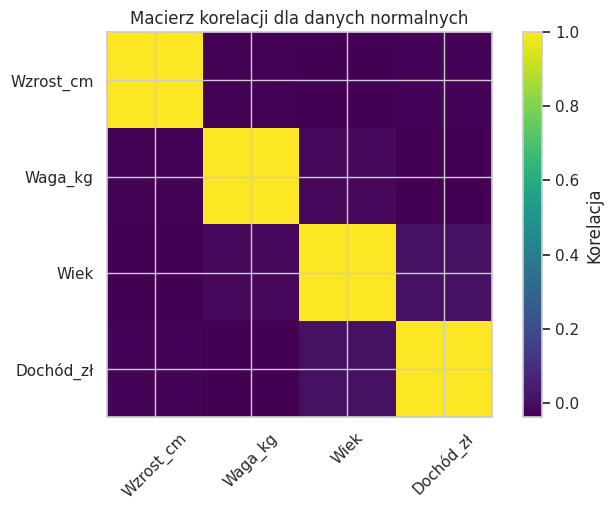

In [ ]:
corr = df_norm.corr()

plt.imshow(corr, cmap="viridis")
plt.colorbar(label="Korelacja")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Macierz korelacji dla danych normalnych")
plt.show()


Case study: klasyfikacja wina – wartość preprocesingu

Wyobraźmy sobie, że pracujemy dla firmy zajmującej się produkcją lub analizą win.
Firma ma dane laboratoryjne o próbkach win. Dla każdej próbki zmierzono między innymi:

- zawartość alkoholu,
- kwasowość,
- ilość magnezu,
- ilość fenoli,
- kolor (intensywność barwy),
- inne parametry chemiczne.

Na podstawie tych cech chcemy automatycznie przewidywać, do której klasy należy wino.
Może to oznaczać:
- typ wina (np. odmiana szczepu),
- jakość,
- przynależność do konkretnego regionu.

W tym case study użyjemy gotowego zbioru danych "wine" z biblioteki sklearn.
Każdy rekord to jedna próbka wina, a zmienne opisowe to cechy chemiczne.
Zmienna docelowa (target) to klasa wina (wartość całkowita: 0, 1 lub 2).

Cel:
- zbudować model klasyfikacyjny,
- najpierw bez poważnego preprocesingu,
- następnie z sensownym preprocesingiem (skalowanie cech),
- porównać jakość modelu przed i po preprocesingu.

Dlaczego ten przykład dobrze pokazuje wartość preprocesingu?

Ponieważ cechy mają bardzo różne skale, na przykład:
- "alcohol" może mieć wartości rzędu kilkunastu,
- "magnesium" może mieć wartości rzędu kilkuset,
- inne cechy mają wartości ułamkowe.

Algorytmy oparte na odległościach, takie jak k-NN (k-nearest neighbors),
są bardzo wrażliwe na skalę cech. Jeśli jedna cecha ma dużo większą skalę,
„zdominuje” inne w obliczaniu odległości.

Dlatego:
- najpierw zbudujemy model k-NN bez skalowania,
- potem ten sam model z zastosowaniem standaryzacji,
- pokażemy różnicę w dokładności (accuracy).

W dalszej kolejności:
- można dodać także inne elementy preprocesingu,
- ale w tym case study skupimy się na skalowaniu, bo efekt jest bardzo wyraźny.


In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

# Wczytanie zbioru danych
wine = load_wine()
X = wine.data
y = wine.target

# Zamiana na DataFrame dla wygody
df_wine = pd.DataFrame(X, columns=wine.feature_names)
df_wine["target"] = y

df_wine.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Krótka eksploracja danych

Po wczytaniu zbioru wine mamy:

- kolumny z cechami chemicznymi, na przykład:
  - "alcohol"
  - "malic_acid"
  - "ash"
  - "magnesium"
  - "proanthocyanins"
  - "color_intensity"
  itd.

- kolumnę "target", która przyjmuje wartości 0, 1, 2 (klasa wina).

Ważna obserwacja:
cechy mają bardzo różne skale. Możemy to zobaczyć, wyświetlając statystyki opisowe.


In [ ]:
df_wine.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Model bazowy bez preprocesingu

Zbudujemy prosty klasyfikator k-NN (k-nearest neighbors).
Idea k-NN:

- dla nowego przykładu szukamy k „najbliższych” przykładów w zbiorze treningowym,
- przypisujemy klasę na podstawie większości wśród tych sąsiadów.

Ważna rzecz:
- k-NN opiera się na odległości (np. euklidesowej),
- cechy o większej skali będą silniej wpływać na odległość.

Jeśli nie zastosujemy skalowania, cecha o dużych liczbach
(np. "magnesium") może zdominować pozostałe,
mimo że z punktu widzenia biznesowego nie jest najważniejsza.

W tej sekcji:
- dzielimy dane na część treningową i testową,
- uczymy model k-NN bez skalowania,
- mierzymy dokładność (accuracy) na zbiorze testowym.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = wine.data
y = wine.target

# Podział na trening/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Model k-NN bez skalowania
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)

y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

print("Dokładność k-NN bez skalowania:", acc_raw)


Dokładność k-NN bez skalowania: 0.7777777777777778


Model z preprocesingiem: standaryzacja cech

Teraz zastosujemy standaryzację cech wejściowych.
Standaryzacja:

$$
x' = \frac{x - \bar{x}}{\sigma}
$$

gdzie:
- $\bar{x}$ to średnia cechy,
- $\sigma$ to odchylenie standardowe.

Po standaryzacji:
- każda cecha ma średnią 0,
- i odchylenie standardowe 1.

Dzięki temu:
- wszystkie cechy wnoszą porównywalny wkład do obliczania odległości,
- k-NN nie jest „skrzywiony” w stronę cech o dużej skali.

Zastosujemy:
- StandardScaler do przekształcenia danych,
- KNeighborsClassifier jako model,
- wszystko w jednym obiekcie Pipeline,
  aby uniknąć błędów (np. przeciek informacji ze zbioru testowego).


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline: najpierw scaler, potem k-NN
pipeline_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

pipeline_knn.fit(X_train, y_train)
y_pred_scaled = pipeline_knn.predict(X_test)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("Dokładność k-NN ze standaryzacją:", acc_scaled)


Dokładność k-NN ze standaryzacją: 0.9333333333333333


Interpretacja wyniku

Porównujemy dwie liczby:

- accuracy bez skalowania,
- accuracy ze standaryzacją.

Zazwyczaj (prawdopodobnie u Ciebie też) zobaczysz, że:

- dokładność modelu k-NN bez skalowania jest zauważalnie niższa,
- dokładność modelu k-NN ze standaryzacją rośnie.

To jest bardzo bezpośredni, praktyczny przykład na to, że:

- Preprocesing (w tym wypadku skalowanie) nie jest ozdobą,
  ale kluczowym elementem procesu.
- Te same dane, ten sam algorytm,
  a wynik istotnie się różni tylko dlatego, że:
  zadbaliśmy o odpowiednie przygotowanie cech.

Biznesowo oznacza to:
- mniej błędnych klasyfikacji (lepsza jakość przewidywania typu wina),
- lepsze decyzje oparte na modelu,
- wyższą jakość systemu rekomendacji lub klasyfikacji produktów.

W innych zadaniach biznesowych (np. scoring kredytowy, wykrywanie churnu,
detekcja oszustw) taki efekt bywa jeszcze mocniejszy,
ponieważ liczba cech jest większa, a ich zakresy bardziej zróżnicowane.


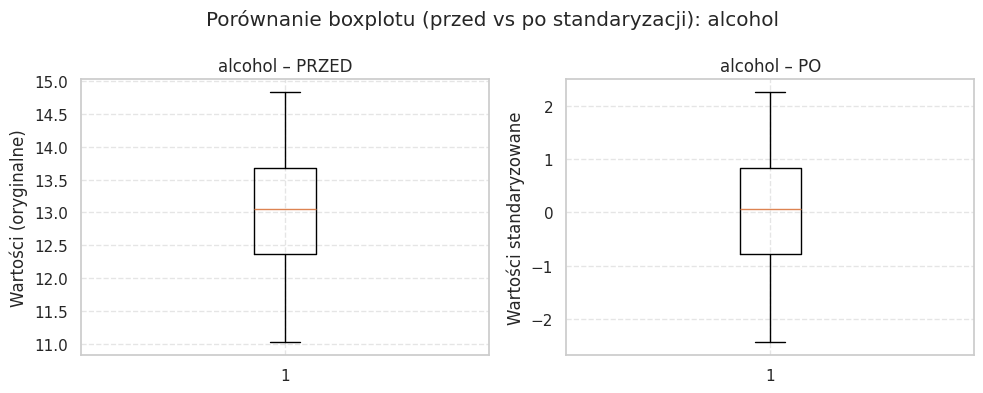

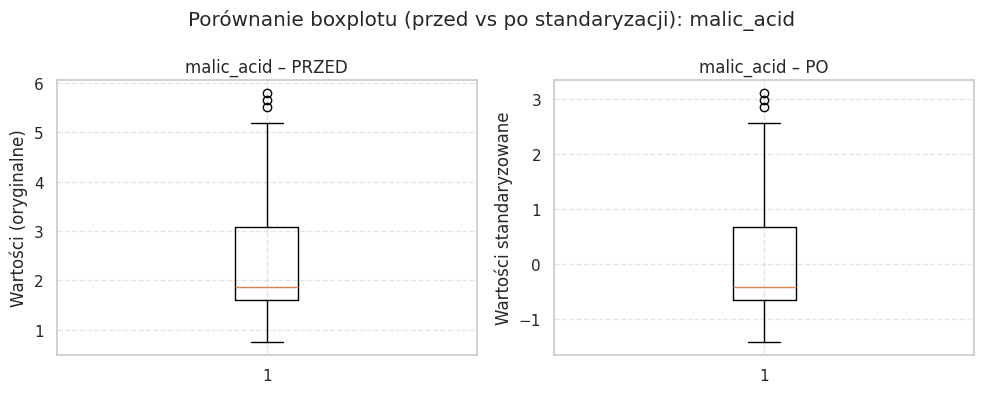

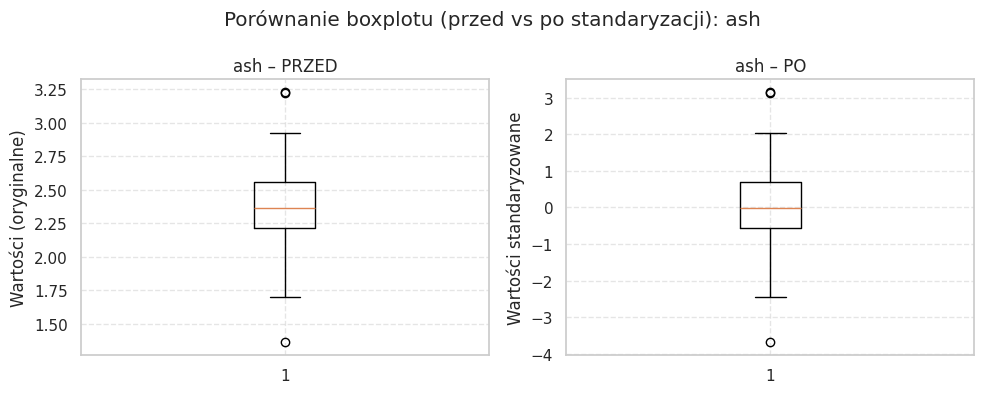

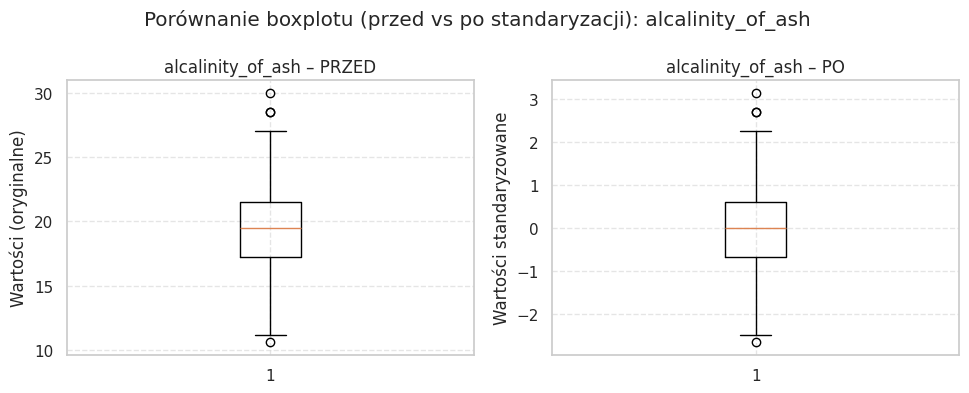

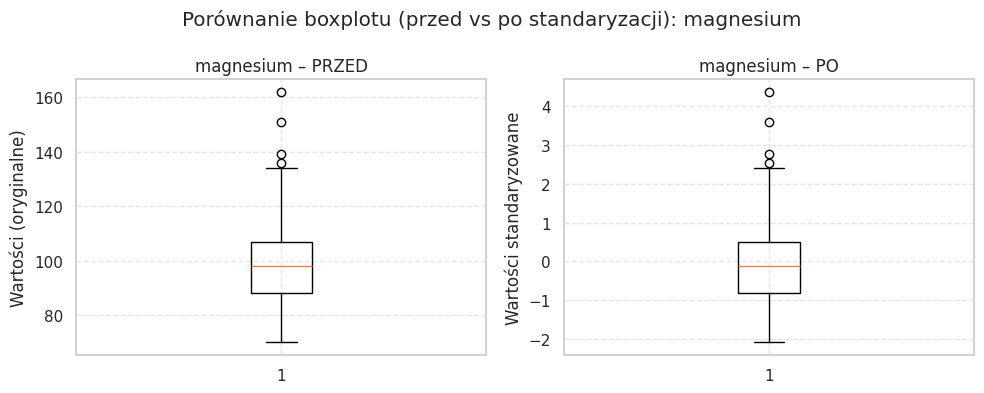

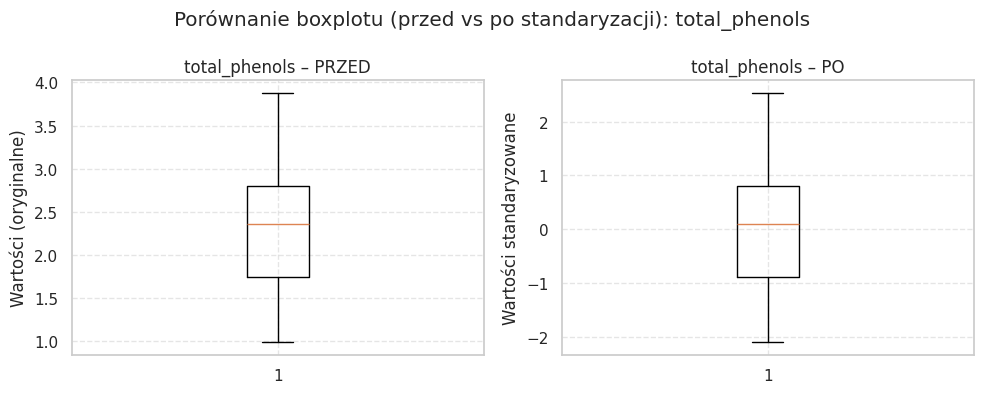

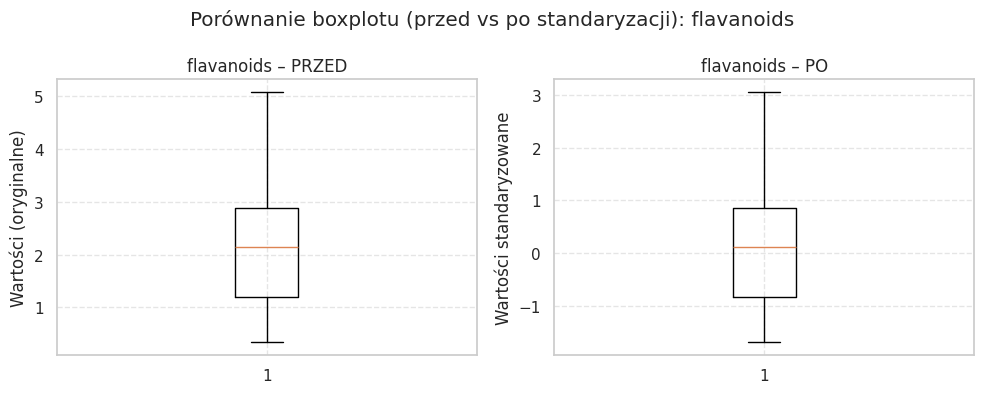

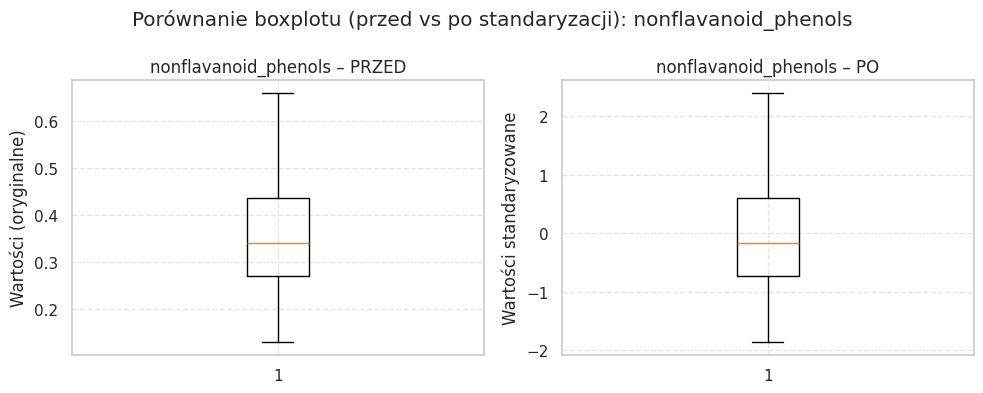

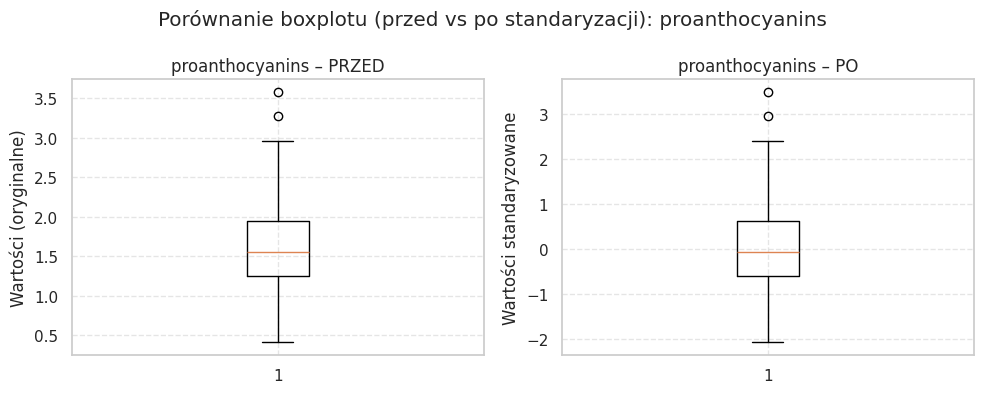

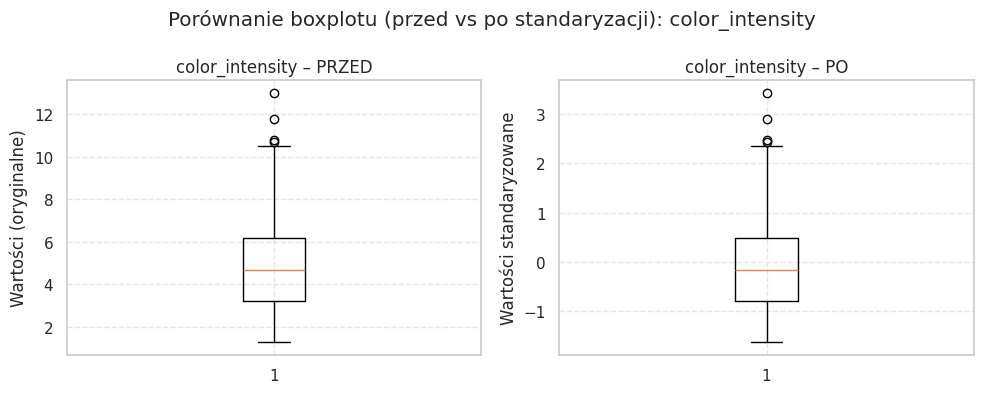

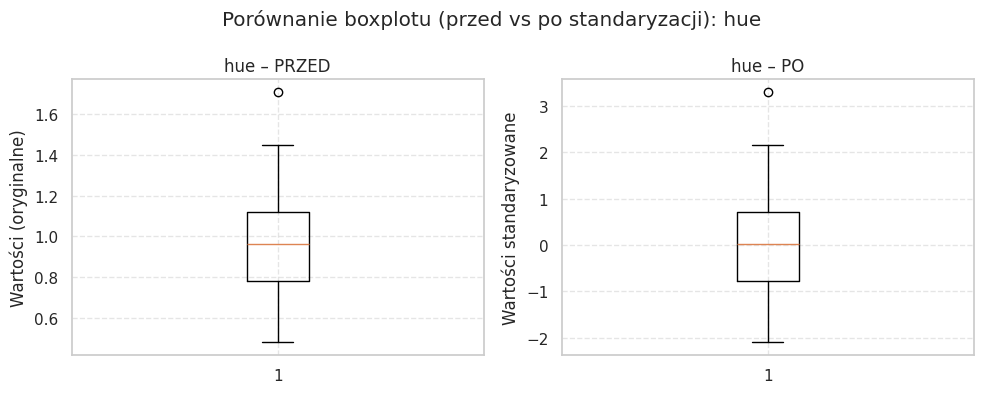

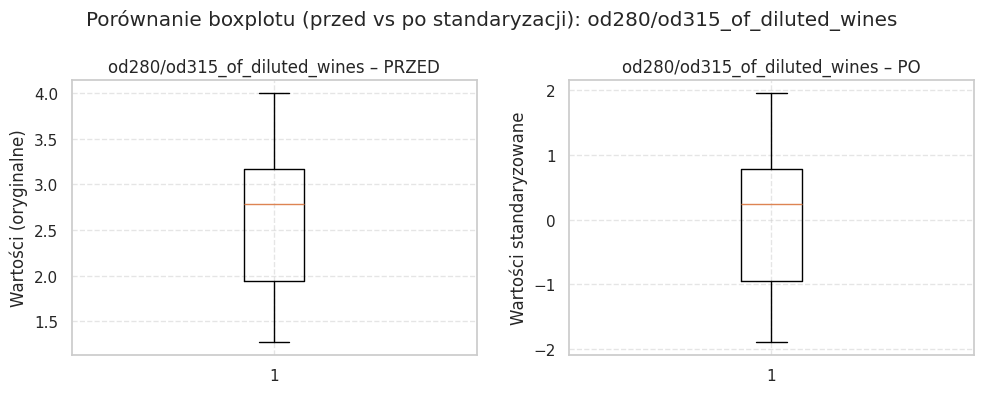

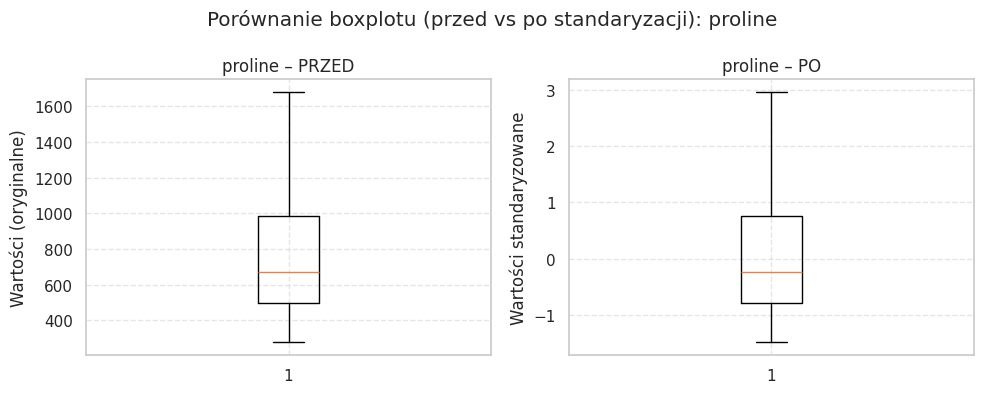

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Cechy do standaryzacji
features = df_wine.columns.drop("target")

# Standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_wine[features])
df_scaled = pd.DataFrame(X_scaled, columns=features)

# Tworzymy dla każdej cechy 2 wykresy obok siebie
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Boxplot PRZED standaryzacją
    axes[0].boxplot(df_wine[feature], vert=True)
    axes[0].set_title(f"{feature} – PRZED")
    axes[0].set_ylabel("Wartości (oryginalne)")
    axes[0].grid(True, linestyle="--", alpha=0.5)

    # Boxplot PO standaryzacji
    axes[1].boxplot(df_scaled[feature], vert=True)
    axes[1].set_title(f"{feature} – PO")
    axes[1].set_ylabel("Wartości standaryzowane")
    axes[1].grid(True, linestyle="--", alpha=0.5)

    plt.suptitle(f"Porównanie boxplotu (przed vs po standaryzacji): {feature}")
    plt.tight_layout()
    plt.show()


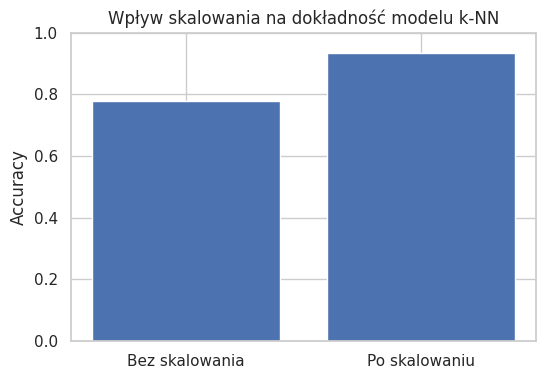

In [ ]:
import matplotlib.pyplot as plt

wyniki = [acc_raw, acc_scaled]
etykiety = ["Bez skalowania", "Po skalowaniu"]

plt.figure(figsize=(6, 4))
plt.bar(etykiety, wyniki)
plt.title("Wpływ skalowania na dokładność modelu k-NN")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


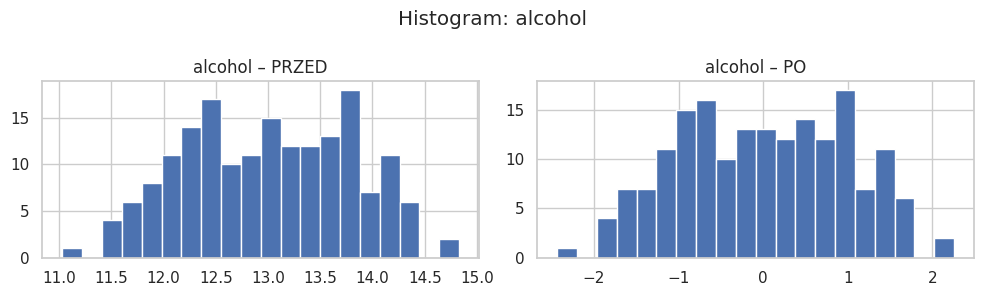

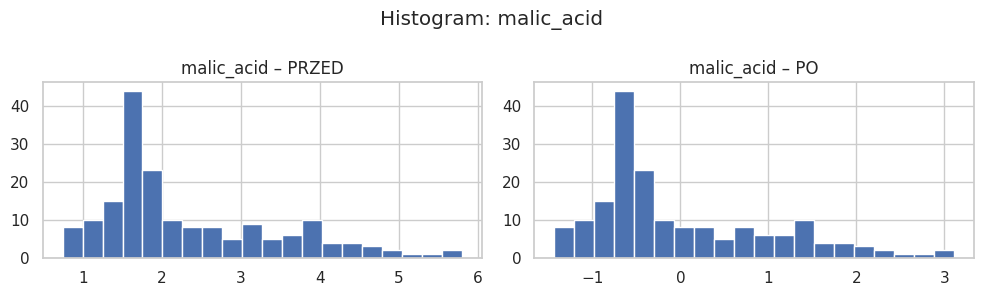

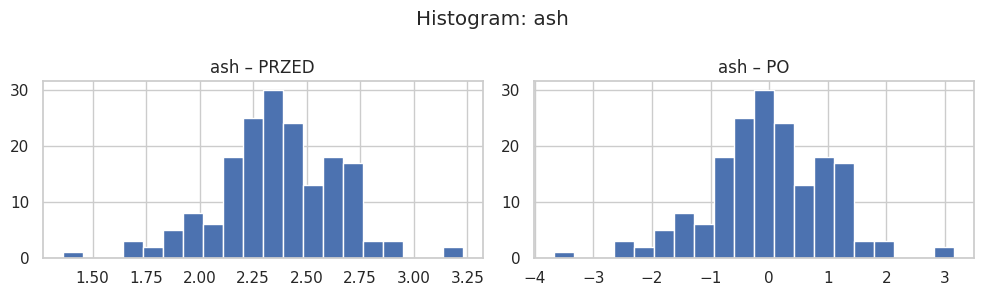

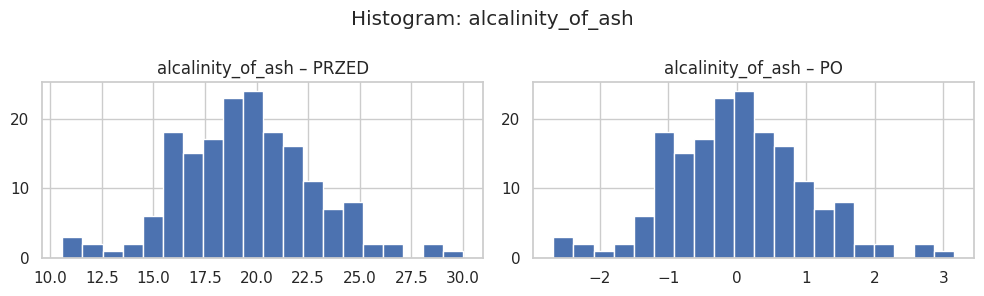

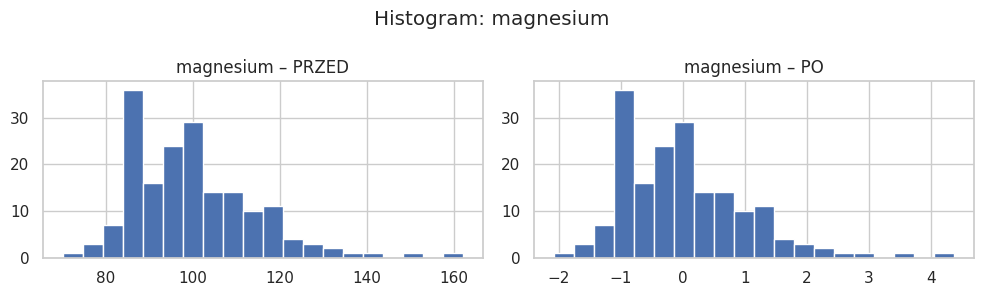

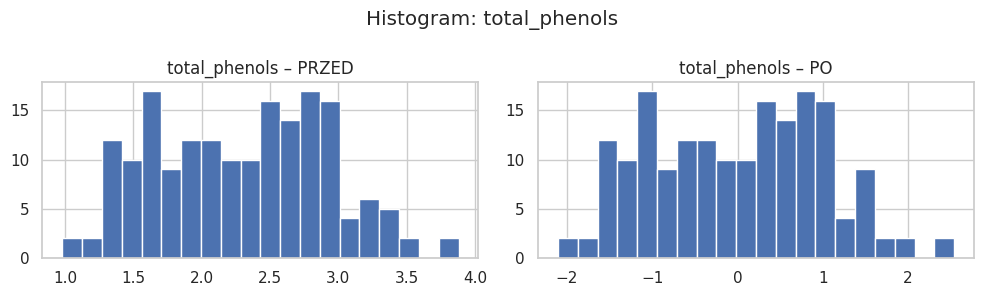

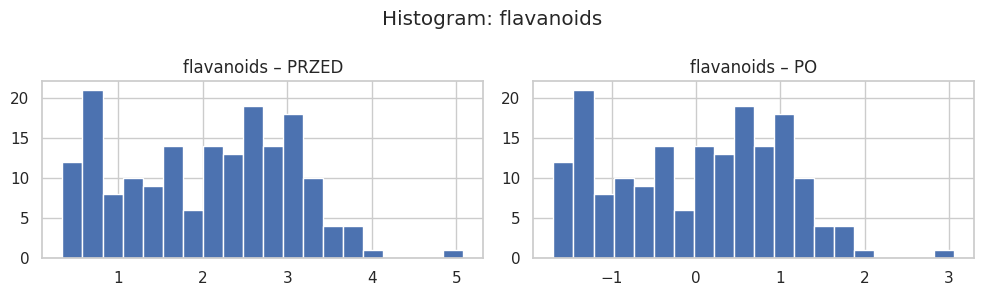

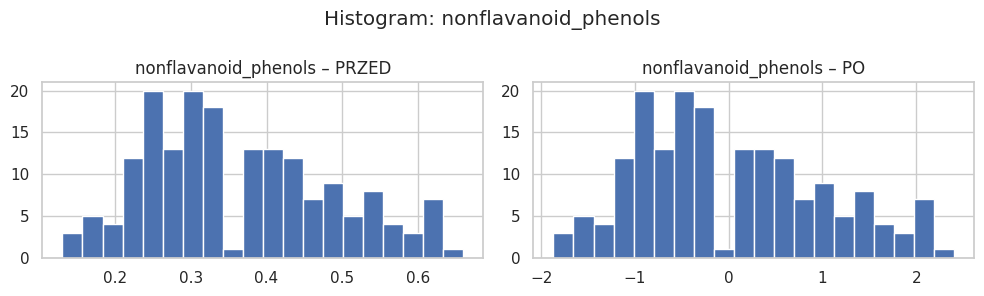

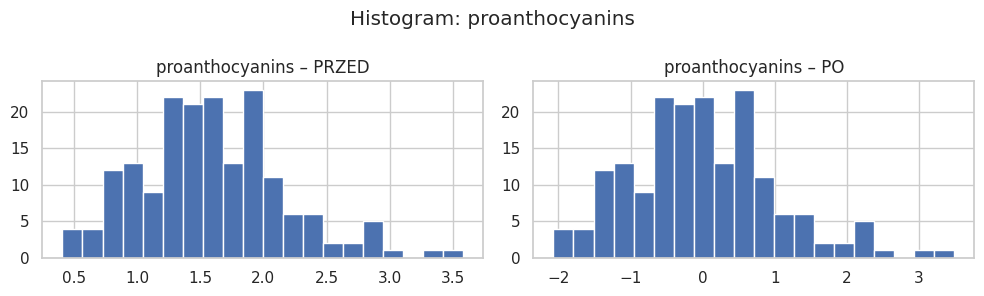

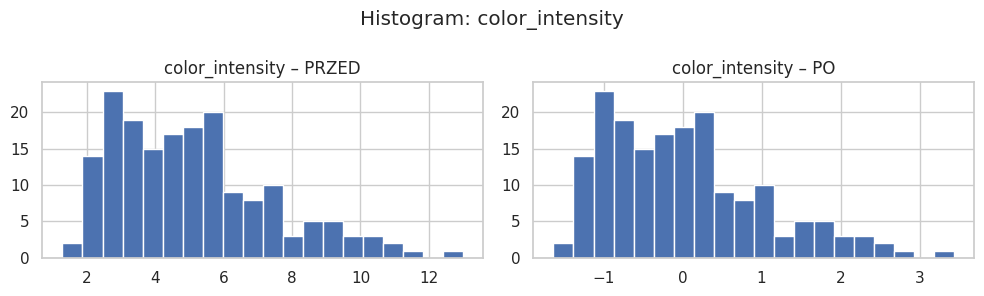

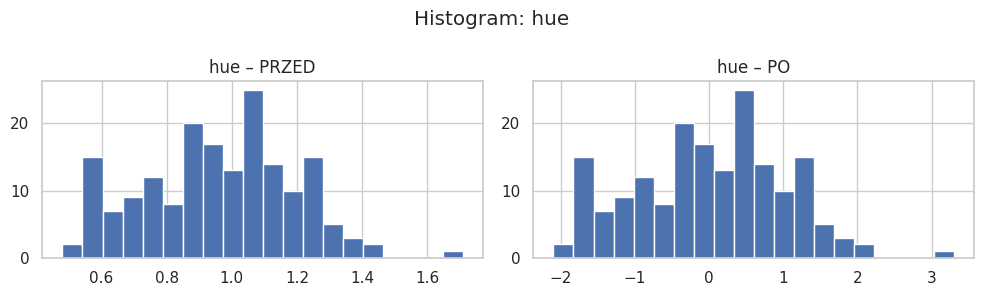

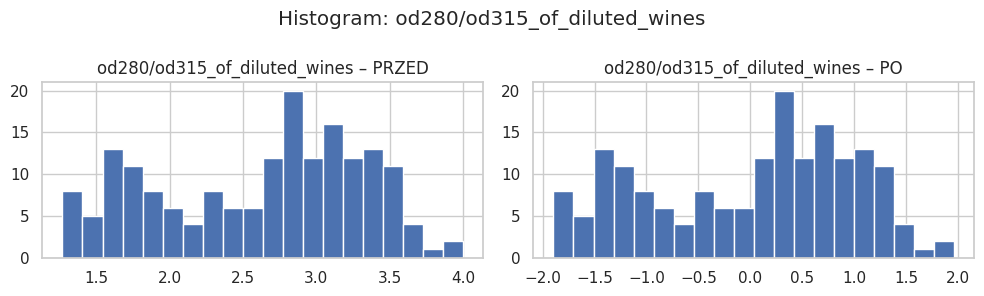

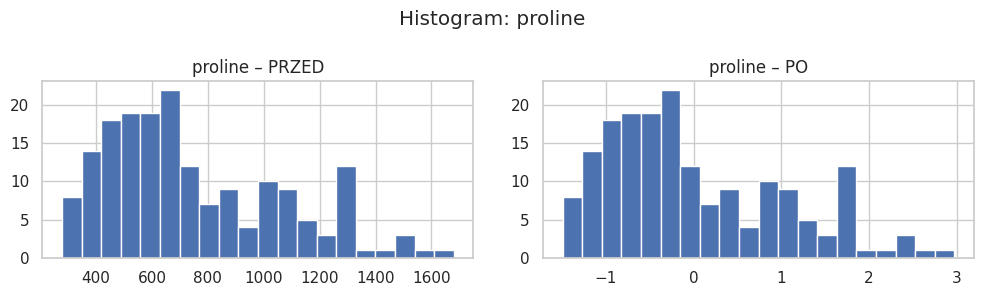

In [ ]:
for feature in features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    axes[0].hist(df_wine[feature], bins=20)
    axes[0].set_title(f"{feature} – PRZED")

    axes[1].hist(df_scaled[feature], bins=20)
    axes[1].set_title(f"{feature} – PO")

    plt.suptitle(f"Histogram: {feature}")
    plt.tight_layout()
    plt.show()


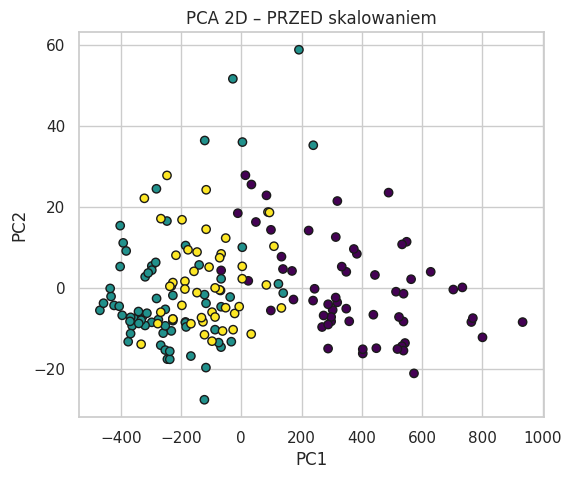

In [ ]:
from sklearn.decomposition import PCA

pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_raw[:, 0], X_pca_raw[:, 1], c=y, cmap="viridis", edgecolor="k")
plt.title("PCA 2D – PRZED skalowaniem")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


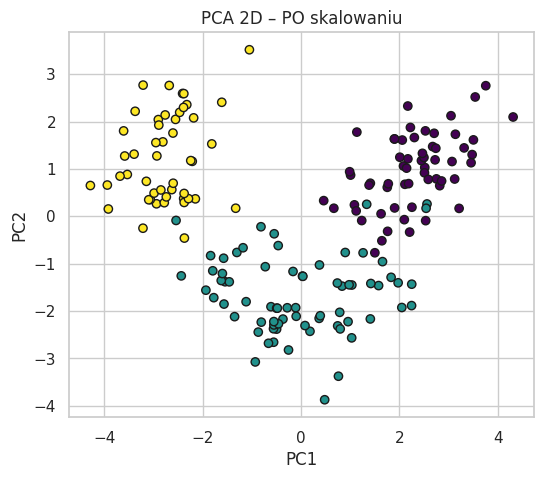

In [ ]:
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y, cmap="viridis", edgecolor="k")
plt.title("PCA 2D – PO skalowaniu")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
